In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from geneticANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<H1>Genetyczny<H1>

<H1>Przygotowanie zbioru danych: XOR<H1>

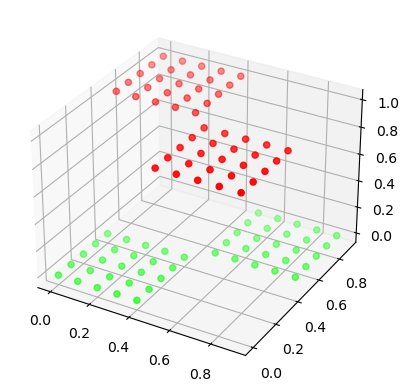

In [21]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

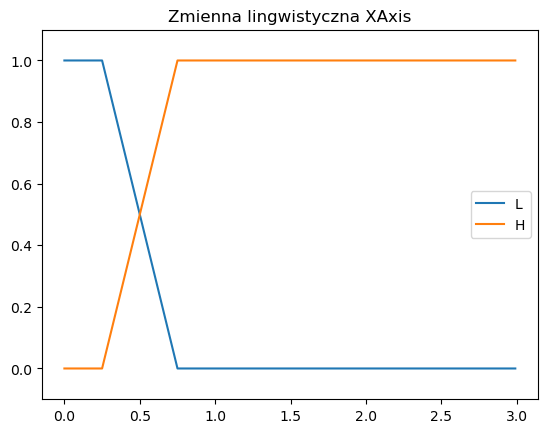

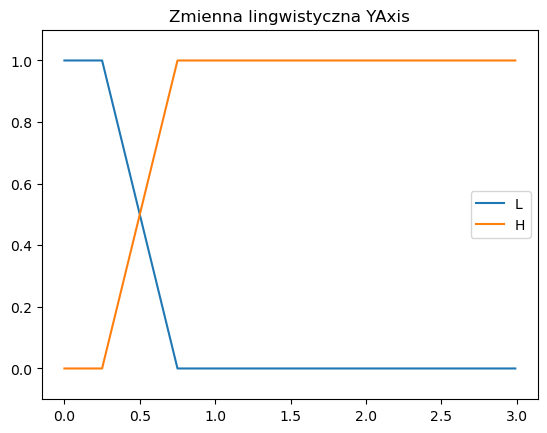

In [22]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.84639477 0.85986463 0.31083012]
 [0.8474832  0.24251021 0.42684123]
 [0.31286145 0.69315029 0.07482619]
 [0.97689295 0.08129045 0.15821968]]


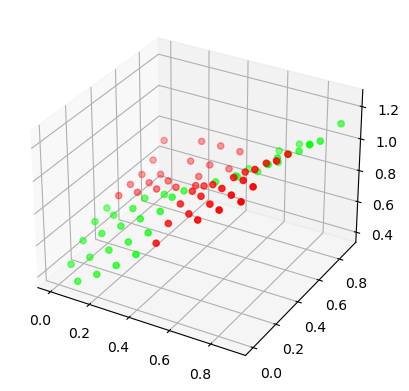

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Current best fitness: 7.489361: 100%|██████████| 256/256 [00:24<00:00, 10.48it/s]      

Optymalizacja zakończona!
z blędem:   7.4893605385284845
Liczba it:  256
TIME elapsed:  25.962993383407593


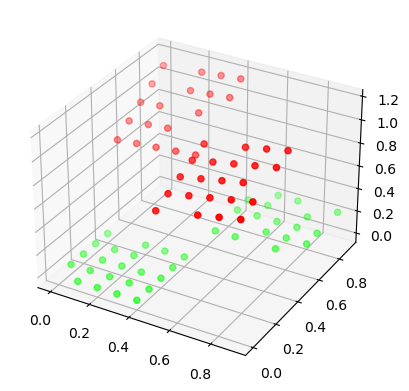

In [28]:
start = time.time()
fis.train(True, True, False, True, n_iter=256, n_units=256)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

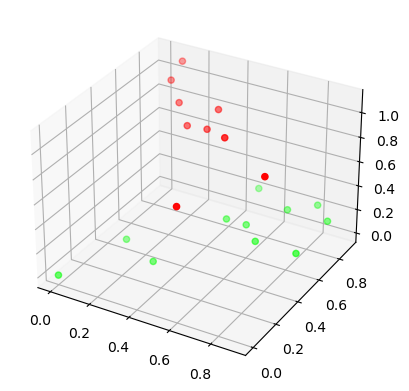

In [29]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
# print(confusion_matrix(y_test, y_pred))

In [30]:
print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry początkowe:
Przesłanki:  [[0.45610108 0.08598801]
 [0.44114566 0.05534903]] 
Konkluzje:  [[2.30132574e-03 5.16306228e-03 6.81328645e-04]
 [3.35674598e-01 5.38524286e-01 6.53288767e-01]
 [1.46987962e-01 8.39069645e-01 3.33822851e-01]
 [2.94902927e-04 3.42079532e-02 1.81559452e-01]]


<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

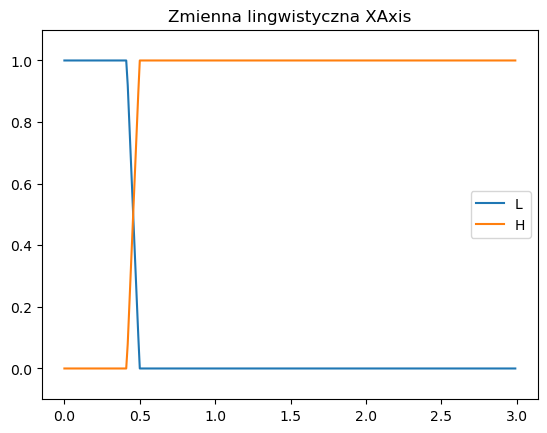

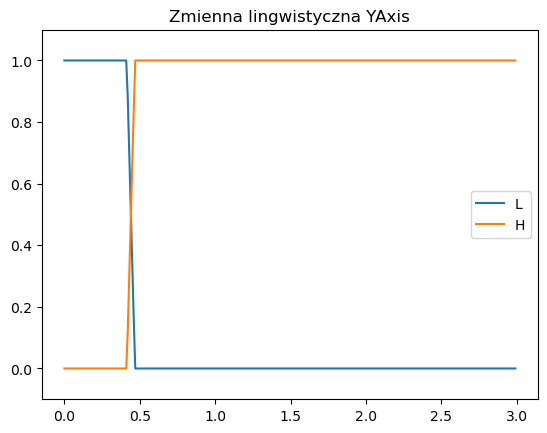

In [31]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [32]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[0.45610108, 0.08598801],
       [0.44114566, 0.05534903]]) 
Konkluzje:  array([[2.30132574e-03, 5.16306228e-03, 6.81328645e-04],
       [3.35674598e-01, 5.38524286e-01, 6.53288767e-01],
       [1.46987962e-01, 8.39069645e-01, 3.33822851e-01],
       [2.94902927e-04, 3.42079532e-02, 1.81559452e-01]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

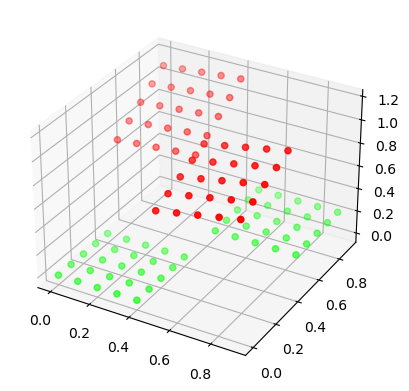

In [33]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

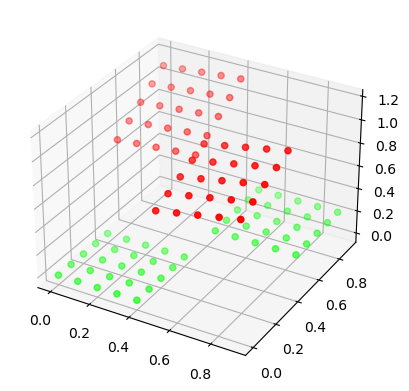

In [34]:
# fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

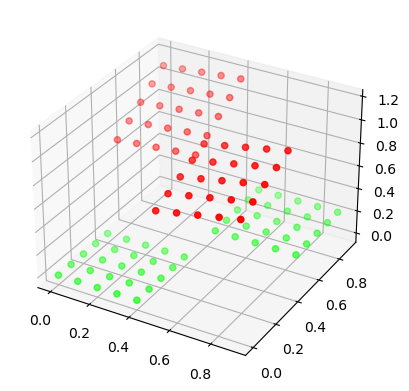

In [35]:
# fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [13]:
%matplotlib auto

Using matplotlib backend: <object object at 0x0000017923941440>


In [14]:
%matplotlib inline

In [15]:
def train_multiplication_table(n=2):
    x = np.arange(1, n, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.multiply(np.round(dataX), np.round(dataY))

    mf1 = [[n+1, 0.25, 0.5, 0.5] for n in range(n)]
    labels = [str(n+1) for n in range(n)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", labels)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", labels)

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2)

    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=1000, n_units=256)
    end = time.time()
    elapsed = end - start
    print("TIME elapsed: ", elapsed)

    fis.training_data = dataXY.T
    fis.expected_labels = data_labels
    fis.show_results()
    print("Parametry koncowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    return result, elapsed

Current best fitness: N/A, with phenotype: N/A:   0%|          | 0/1000 [00:00<?, ?it/s]E:\!SIiUM2\MSI\geneticANFIS.py:91: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum
Current best fitness: 26.785994: 100%|██████████| 1000/1000 [02:16<00:00,  7.30it/s]    


Optymalizacja zakończona!
z blędem:   26.78599438060083
Liczba it:  1000
TIME elapsed:  140.12349891662598


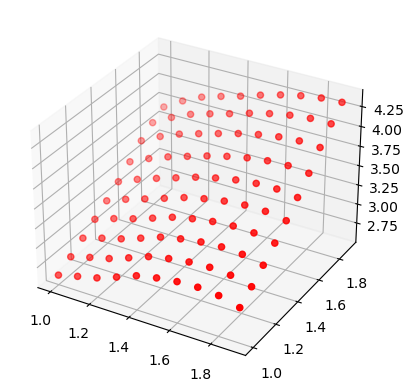

Parametry koncowe:
Przesłanki:  [[[0.8959799  1.00481665 0.58356659 0.62752619]
  [1.81571197 1.19023415 0.48149661 1.78904951]]

 [[1.48133458 0.37584658 1.32334968 1.55857851]
  [0.37827037 0.65828184 0.90584047 1.02821967]]] 
Konkluzje:  [[1.32254329 0.45057433 1.18872986]
 [0.04557738 1.7172236  0.94084964]
 [1.70518635 0.30339452 0.63250371]
 [0.95316852 0.69914317 0.13456642]]


Current best fitness: 249.905474: 100%|██████████| 1000/1000 [03:26<00:00,  4.83it/s]   

Optymalizacja zakończona!
z blędem:   249.9054743704256
Liczba it:  1000
TIME elapsed:  212.29800033569336


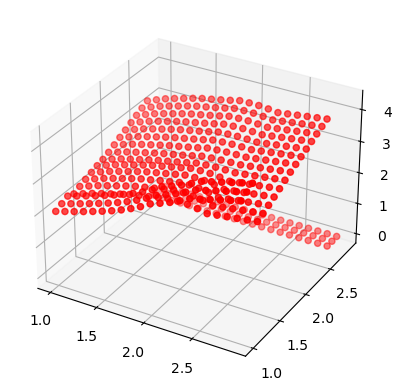

Parametry koncowe:
Przesłanki:  [[[1.39537296 0.33591445 0.88256658 0.81013697]
  [1.41756511 1.1905596  0.79081977 1.08422441]
  [0.84369619 0.28385307 1.41075056 1.01838331]]

 [[0.46309585 1.47315699 0.03207509 1.41748414]
  [1.10149387 0.53827599 1.19887612 0.45592834]
  [0.49619671 1.43950139 0.68000457 0.01878797]]] 
Konkluzje:  [[0.35053796 1.46047926 0.04473655]
 [0.3995884  0.89077156 0.72669322]
 [0.55256094 0.66316396 0.13260531]
 [1.08786622 1.42573911 0.228166  ]
 [0.4220171  0.91761892 0.51937547]
 [0.34468405 0.08033116 1.348895  ]
 [0.57164232 0.52433261 0.55539037]
 [1.43263362 1.42778495 1.18038453]
 [0.53211984 0.66410086 0.11240237]]


Current best fitness: 1313.922242: 100%|██████████| 1000/1000 [04:35<00:00,  3.63it/s]  

Optymalizacja zakończona!
z blędem:   1313.9222424607474
Liczba it:  1000
TIME elapsed:  283.81999945640564


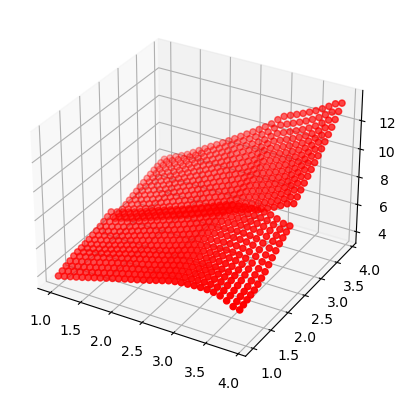

Parametry koncowe:
Przesłanki:  [[[1.63473346 2.33258531 0.23527463 0.97033281]
  [1.59610059 0.43395348 2.43258848 2.17348539]
  [2.71477697 0.68019558 2.15801185 2.31207178]
  [1.16535232 0.42778391 2.30309347 1.57909292]]

 [[2.41477999 0.6222726  0.69780059 2.52709699]
  [1.46764778 1.87106942 1.42163364 0.07777157]
  [0.29539755 0.63656535 1.07365748 1.06578859]
  [1.68691733 1.6932978  1.8992041  1.3452356 ]]] 
Konkluzje:  [[2.0490257  0.3136682  2.44165862]
 [0.66682755 2.38444892 0.02190471]
 [0.79718165 2.47610793 0.7213551 ]
 [0.1514583  0.07642928 0.34202407]
 [2.05594375 2.64183928 2.31624445]
 [2.35146841 2.0779952  0.31580028]
 [0.74822431 0.67027397 0.80191924]
 [0.69939788 0.25656615 2.5452228 ]
 [1.69462311 1.74518674 1.88371652]
 [1.73060827 1.56105908 0.24103633]
 [0.75513243 1.63895171 2.17749281]
 [1.59725661 0.60445143 1.53405031]
 [0.49344008 0.65301661 0.6943565 ]
 [0.6380955  1.61911284 0.74712253]
 [0.24907228 2.30968519 2.20445889]
 [0.58332632 1.4574725  0.3

Current best fitness: 3102.216785: 100%|██████████| 1000/1000 [09:19<00:00,  1.79it/s]  

Optymalizacja zakończona!
z blędem:   3102.2167853646433
Liczba it:  1000
TIME elapsed:  570.0010011196136


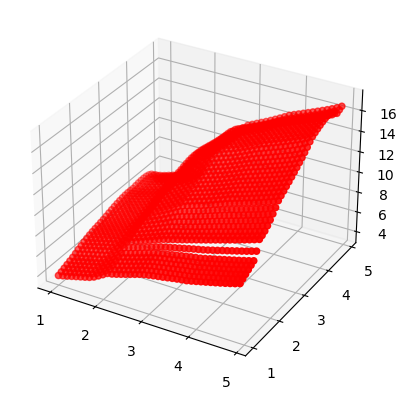

Parametry koncowe:
Przesłanki:  [[[0.40041217 2.69610509 0.21760308 0.35147424]
  [1.41503675 0.35104135 0.8620423  1.24930866]
  [2.77268571 1.08739239 0.31571357 1.83205536]
  [0.11477852 2.45552488 1.63158675 2.46697154]
  [1.68375027 2.43230674 1.36441037 2.30842188]]

 [[1.70406658 0.29905128 1.28268733 0.55698069]
  [2.1767549  0.88084693 2.3521061  2.44773035]
  [1.14046024 0.78172669 1.3466679  0.14872236]
  [1.51798475 1.22893727 2.1311805  2.51219807]
  [1.94152613 0.11180307 1.47726596 1.67105613]]] 
Konkluzje:  [[0.95882851 0.76761113 0.28329708]
 [2.02230713 2.2130004  0.43445186]
 [1.81730086 0.16976976 2.04366504]
 [1.51120361 1.7230451  2.44914106]
 [0.62711963 1.05512757 2.113843  ]
 [0.19566335 0.61997746 0.36566429]
 [1.07222586 0.09685202 0.17654306]
 [1.07260942 1.52271669 1.43563497]
 [2.66593786 0.2005222  0.59618202]
 [2.610986   1.08901877 1.05768309]
 [2.15593701 0.11925544 0.9271205 ]
 [0.41350476 0.04321331 2.60450772]
 [0.07887216 2.55764442 0.29268863]
 [1

In [16]:
times = [train_multiplication_table(n) for n in range(2, 6)]

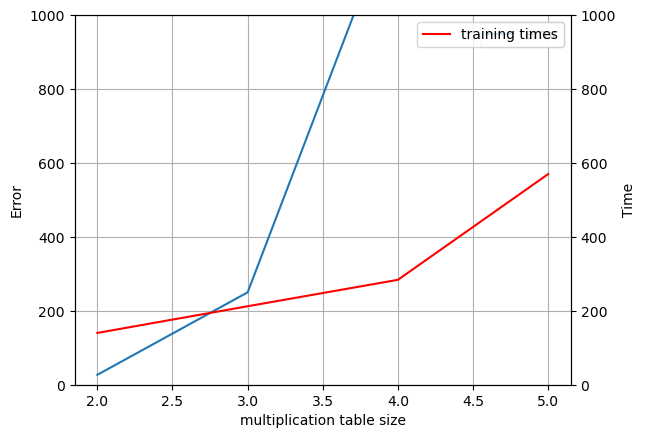

In [17]:
fig = plt.figure()
x = np.arange(2, 6, 1)
# Plotting dataset_2
ax = fig.add_subplot(111)
errors = [t[0] for t in times]
times = [t[1] for t in times]

ax.plot(x, errors, '-', label='error')

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
ax2.plot(x, times, '-r', label='training times')

ax.legend(loc=0)
ax2.legend(loc=0)

ax.grid()

ax.set_xlabel("multiplication table size")
ax.set_ylabel(r"Error")
ax2.set_ylabel(r"Time")

# Setting Y limits
ax.set_ylim(0, 1000)
ax2.set_ylim(0, 1000)

# Show plot
plt.show()


In [18]:
times

[140.12349891662598, 212.29800033569336, 283.81999945640564, 570.0010011196136]

In [19]:
errors

[26.78599438060083, 249.9054743704256, 1313.9222424607474, 3102.2167853646433]